In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from FCI_functions.FCI_functions import calculate_pre_score, calculate_post_score, calculate_question_score_post, calculate_question_score_pre

In [2]:
df16_111 = pd.read_excel('rawdata/2016-17 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df16_112 = pd.read_excel('rawdata/2016-17 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_111 = pd.read_excel('rawdata/2014-15 WT1 Phys 111 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df14_112 = pd.read_excel('rawdata/2014-15 WT1 Phys 112 ALL Data - Shared with Chelsea (20210212).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_111 = pd.read_excel('rawdata/2015-16 WT1 Phys 111 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df15_112 = pd.read_excel('rawdata/2015-16 WT1 Phys 112 ALL Data - Shared with Chelsea.xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_111 = pd.read_excel('rawdata/2017-18 WT1 Phys 111 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df17_112 = pd.read_excel('rawdata/2017-18 WT1 Phys 112 ALL Data - Shared with David (20190612).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_111 = pd.read_excel('rawdata/2018-19 WT1 Phys 111 ALL Data - Shared with David (20190530).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df18_112 = pd.read_excel('rawdata/2018-19 WT1 Phys 112 ALL Data - Shared with David (20190527).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_111 = pd.read_excel('rawdata/2019-20 WT1 Phys 111 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)
df19_112 = pd.read_excel('rawdata/2019-20 WT1 Phys 112 ALL Data - Shared with Maya (20211222).xlsx').replace(["BLANK", "!!", "MULT"], np.nan)

In [65]:
df_all = pd.concat([df16_111, df16_112, df14_111, df14_112, df15_111, df15_112, df17_111, df17_112, df18_111,
                    df18_112,df19_111, df19_112])
df_all
indices = []
for i in range (0,len(df_all.index)):
    indices.append(i)
df_all.index = indices
df_all

,Session,Course,Lecture,Secondary,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,PRE Q4,...,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96,Tertiary Section,pre_FDM,post_FDM,gain_FDM,Secondary Section
0,2016W,111,1,L03,71.0,B-,C,A,B,A,...,C,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016W,111,1,L12,78.0,B+,C,D,B,E,...,C,A,A,B,NaN,NaN,NaN,NaN,NaN,NaN
2,2016W,111,1,L04,88.0,A,C,D,C,A,...,C,A,C,B,NaN,NaN,NaN,NaN,NaN,NaN
3,2016W,111,1,L02,66.0,C+,NaN,NaN,NaN,NaN,...,A,C,D,E,NaN,NaN,NaN,NaN,NaN,NaN
4,2016W,111,1,L02,74.0,B,D,B,A,A,...,B,A,C,C,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,2019W,112,2,NaN,81.0,A-,C,B,B,E,...,NaN,NaN,NaN,NaN,NaN,T10,NaN,NaN,NaN,L14
3334,2019W,112,2,NaN,86.0,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,T06,NaN,NaN,NaN,L05
3335,2019W,112,2,NaN,87.0,A,A,B,A,A,...,C,C,A,C,C,T01,NaN,NaN,NaN,L07
3336,2019W,112,2,NaN,86.0,A,D,D,B,B,...,B,C,A,B,C,XM2,NaN,NaN,NaN,L13


In [3]:
def calculate_pre_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "PRE Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1                
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [4]:
def calculate_post_score_FDM(student):
    corr_ans = ['C' , 'D', 'B' , 'C', 'B' , 'C' , 'E', 'A', 'C' , 'D' , 'E', 'A']
    score = 0
    questions = [5, 5, 11, 11, 13, 13, 13, 17, 18, 18, 18, 27]
    for i in range(12):
        string = "POST Q"+ str(questions[i])
        if string in student:
            if student[string]==corr_ans[i]:
                score+=1
            if pd.isna(student[string]):
                score=None
                break
            
    return (score)

In [5]:
fdm111 = pd.DataFrame()
fdm112 = pd.DataFrame()
def FDM(df111, df112, year):
    gain_FDM = pd.DataFrame([df111.apply(calculate_post_score_FDM, axis=1) - df111.apply(calculate_pre_score_FDM, axis=1)])
    pre_FDM = pd.DataFrame([df111.apply(calculate_pre_score_FDM, axis=1)])
    
    df111['gain_FDM'] = gain_FDM.transpose()
    df111['pre_FDM'] = pre_FDM.transpose()
    
    df111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    df111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=8)
    plt.legend(["post", "pre"])
    plt.title("111 " + year)
    #plt.xlim(0,7)
    plt.show()
    
    df1 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 PRE " + year)
    fdm111["111 PRE" + year] = df1
    df1["111 POST "+ year] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm111["111 POST" + year] = df1["111 POST "+ year]

    print(df1)

    df112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("112 "+ year)
    #plt.xlim(0,7)
    plt.show()

    df2 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 PRE " + year)
    fdm112["112 PRE" + year] = df2
    df2["112 POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    fdm112["112 POST" + year] = df2["112 POST "+ year]
    
    print(df2)

    is_f111 = df111['PRE Q85']== 'A'
    df_f111 = df111[is_f111]
    
    is_f112 = df112['PRE Q85']== 'A'
    df_f112 = df112[is_f112]

    df_f111.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f111.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 111 " + year)
    plt.show()
    
    df3 = df111.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "111 FEMALE PRE")
    df3["111 FEMALE POST " + year ] = df111.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)

    print(df3)
    
    df_f112.apply(calculate_post_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    df_f112.apply(calculate_pre_score_FDM, axis=1).plot.hist(alpha=0.5, bins=7)
    plt.legend(["post", "pre"])
    plt.title("Female 112 " + year)
    plt.show()
    
    df4 = df112.apply(calculate_pre_score_FDM, axis=1).value_counts(normalize=True, ascending=True).to_frame(name = "112 FEMALE PRE")
    df4["112 FEMALE POST " + year] = df112.apply(calculate_post_score_FDM, axis=1).value_counts(normalize=True, ascending=True)
    print(df4)


In [67]:
df_all['pre_FDM'] = df_all.apply(calculate_pre_score_FDM, axis=1)
df_all['post_FDM'] = df_all.apply(calculate_post_score_FDM, axis=1)
df_all['gain_FDM'] = df_all['post_FDM']-df_all['pre_FDM'] 
df_all

,Session,Course,Lecture,Secondary,Percent Grade,Letter Grade,PRE Q1,PRE Q2,PRE Q3,PRE Q4,...,POST Q92,POST Q93,POST Q94,POST Q95,POST Q96,Tertiary Section,pre_FDM,post_FDM,gain_FDM,Secondary Section
0,2016W,111,1,L03,71.0,B-,C,A,B,A,...,C,A,NaN,NaN,NaN,NaN,2.0,1.0,-1.0,NaN
1,2016W,111,1,L12,78.0,B+,C,D,B,E,...,C,A,A,B,NaN,NaN,NaN,1.0,NaN,NaN
2,2016W,111,1,L04,88.0,A,C,D,C,A,...,C,A,C,B,NaN,NaN,2.0,0.0,-2.0,NaN
3,2016W,111,1,L02,66.0,C+,NaN,NaN,NaN,NaN,...,A,C,D,E,NaN,NaN,NaN,6.0,NaN,NaN
4,2016W,111,1,L02,74.0,B,D,B,A,A,...,B,A,C,C,NaN,NaN,3.0,2.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3333,2019W,112,2,NaN,81.0,A-,C,B,B,E,...,NaN,NaN,NaN,NaN,NaN,T10,4.0,NaN,NaN,L14
3334,2019W,112,2,NaN,86.0,A,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,T06,NaN,NaN,NaN,L05
3335,2019W,112,2,NaN,87.0,A,A,B,A,A,...,C,C,A,C,C,T01,6.0,3.0,-3.0,L07
3336,2019W,112,2,NaN,86.0,A,D,D,B,B,...,B,C,A,B,C,XM2,4.0,4.0,0.0,L13


<AxesSubplot:ylabel='Frequency'>

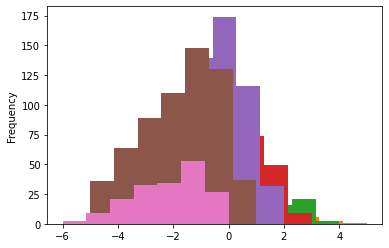

In [68]:
zero = df_all[df_all['pre_FDM'] == 0]
zero["gain_FDM"].plot.hist(alpha=1, bins=zero["gain_FDM"].value_counts().size)

one = df_all[df_all['pre_FDM'] == 1]
one["gain_FDM"].plot.hist(alpha=1, bins=one["gain_FDM"].value_counts().size)

two = df_all[df_all['pre_FDM'] == 2]
two["gain_FDM"].plot.hist(alpha=1, bins=two["gain_FDM"].value_counts().size)

three = df_all[df_all['pre_FDM'] == 3]
three["gain_FDM"].plot.hist(alpha=1, bins=three["gain_FDM"].value_counts().size)

four = df_all[df_all['pre_FDM'] == 4]
four["gain_FDM"].plot.hist(alpha=1, bins=four["gain_FDM"].value_counts().size)

five = df_all[df_all['pre_FDM'] == 5]
five["gain_FDM"].plot.hist(alpha=1, bins=five["gain_FDM"].value_counts().size)

six = df_all[df_all['pre_FDM'] == 6]
six["gain_FDM"].plot.hist(alpha=1, bins=six["gain_FDM"].value_counts().size)

Text(0.5, 1.0, 'Sixes')

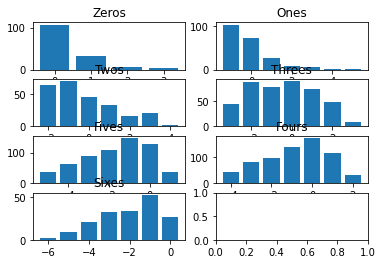

In [89]:
figure, axis = plt.subplots(4, 2)
axis[0, 0].bar(zero["gain_FDM"].value_counts().index, zero["gain_FDM"].value_counts())
axis[0, 0].set_title("Zeros")
axis[0, 1].bar(one["gain_FDM"].value_counts().index, one["gain_FDM"].value_counts())
axis[0, 1].set_title("Ones")
axis[1, 0].bar(two["gain_FDM"].value_counts().index, two["gain_FDM"].value_counts())
axis[1, 0].set_title("Twos")
axis[1, 1].bar(three["gain_FDM"].value_counts().index, three["gain_FDM"].value_counts())
axis[1, 1].set_title("Threes")
axis[2, 1].bar(four["gain_FDM"].value_counts().index, four["gain_FDM"].value_counts())
axis[2, 1].set_title("Fours")
axis[2, 0].bar(five["gain_FDM"].value_counts().index, five["gain_FDM"].value_counts())
axis[2, 0].set_title("Fives")
axis[3, 0].bar(six["gain_FDM"].value_counts().index, six["gain_FDM"].value_counts())
axis[3, 0].set_title("Sixes")

Text(0, 0.5, 'Frequency')

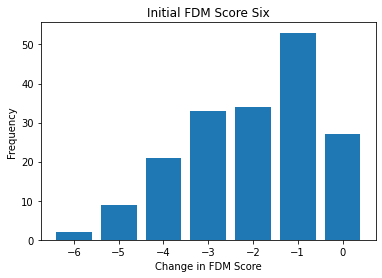

In [88]:
plt.bar(six["gain_FDM"].value_counts().index, six["gain_FDM"].value_counts())
plt.title("Initial FDM Score Six")
plt.xlabel('Change in FDM Score')
plt.ylabel('Frequency')